In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn import datasets, linear_model, metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

#### Step 1: Loading Dataset and info
    * Describe the dataset
    * info the dataset

#### Step 2: EDA and Visualization
    * Plot all the various plot
    * pair plot to check all variables correlation distribution
    * Correlation heatmap matrics
    * Null values checking
    * Outlier Detection
    * Target Variable distribution

#### Step 3: Data Pre Processing
    * Label encoding
    * One hot encoding 
    * Dummy variable
    * Droping COlumns

#### Step 4: Splitting the Data into Training and Testing Sets
    * Spliting the data into train x and y, test x and y

#### Step 5: Fitting the data into model and Checking Linear Regression Assumption
    * Fitting the dataset into OSL model
    * Fitting the datset into custom linear regression model

    * Checking VIF matirx and removing the variable

    * Linear Regression Assumptions
    To check our model is fit well or not, we have to check some assumption.

    * Linear Regression Assumption 1 — Independence of observations
    * Linear Regression Assumption 2 — No Hidden or Missing Variables
    * Linear RegressionAssumption 3 — Linear relationship
    * Linear Regression Assumption 4 — Normality of the residuals
    * Linear Regression Assumption 5 — No or little Multicollinearity
    * Linear Regression Assumption 6 — Homoscedasticity
    * Linear Regression Assumption 7 — All independent variables are uncorrelated with the error term 
    * Linear Regression Assumption 8 — Observations of the error term are uncorrelated with each other

#### Step 6: Scoring Metrics and Checking Error

    * Checking the R2_score
    * Checking the error Error normally



## Step 1: Loading Dataset and info

In [3]:
df = pd.read_csv('day.csv')

In [4]:
df.shape

(730, 16)

In [5]:
df.head() #https://towardsdatascience.com/make-the-cutest-chart-in-python-visualize-your-data-with-hand-drawn-charts-f21157f76b4b

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# droping the instant and dteday features
df.drop(columns=['instant','dteday'], inplace=True)

## Step 2: EDA and Visualization

* Visualizing the temp vs cnt

Text(0.5, 1.0, 'Temperature Vs Count')

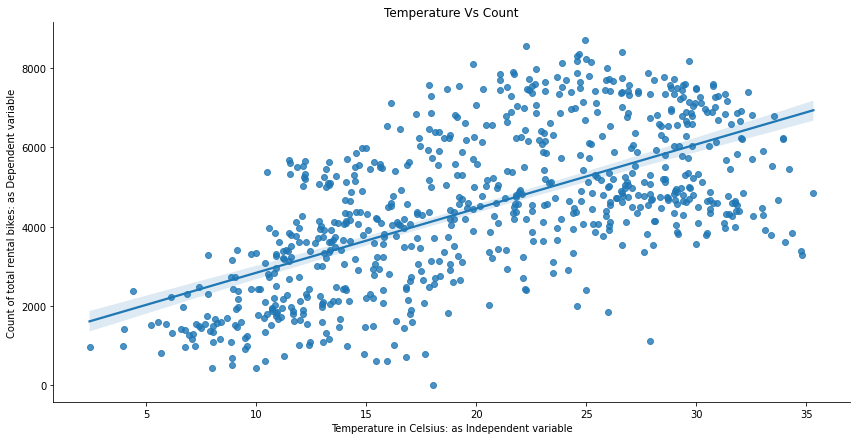

In [9]:
sns.lmplot(x='temp',y='cnt',data=df,aspect=2,height=6)
plt.xlabel('Temperature in Celsius: as Independent variable')
plt.ylabel('Count of total rental bikes: as Dependent variable')
plt.title('Temperature Vs Count')

* Ploting missing vale from dataset

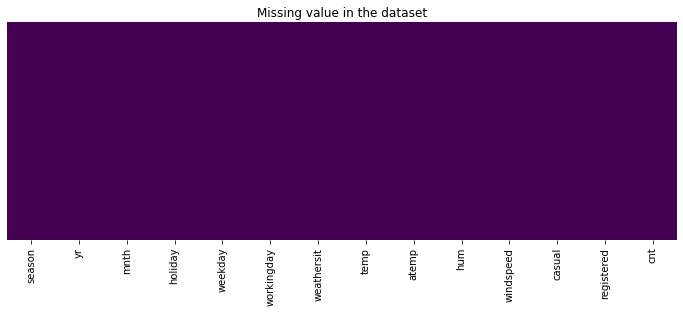

In [10]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

* using this graph we can see there is no missing values

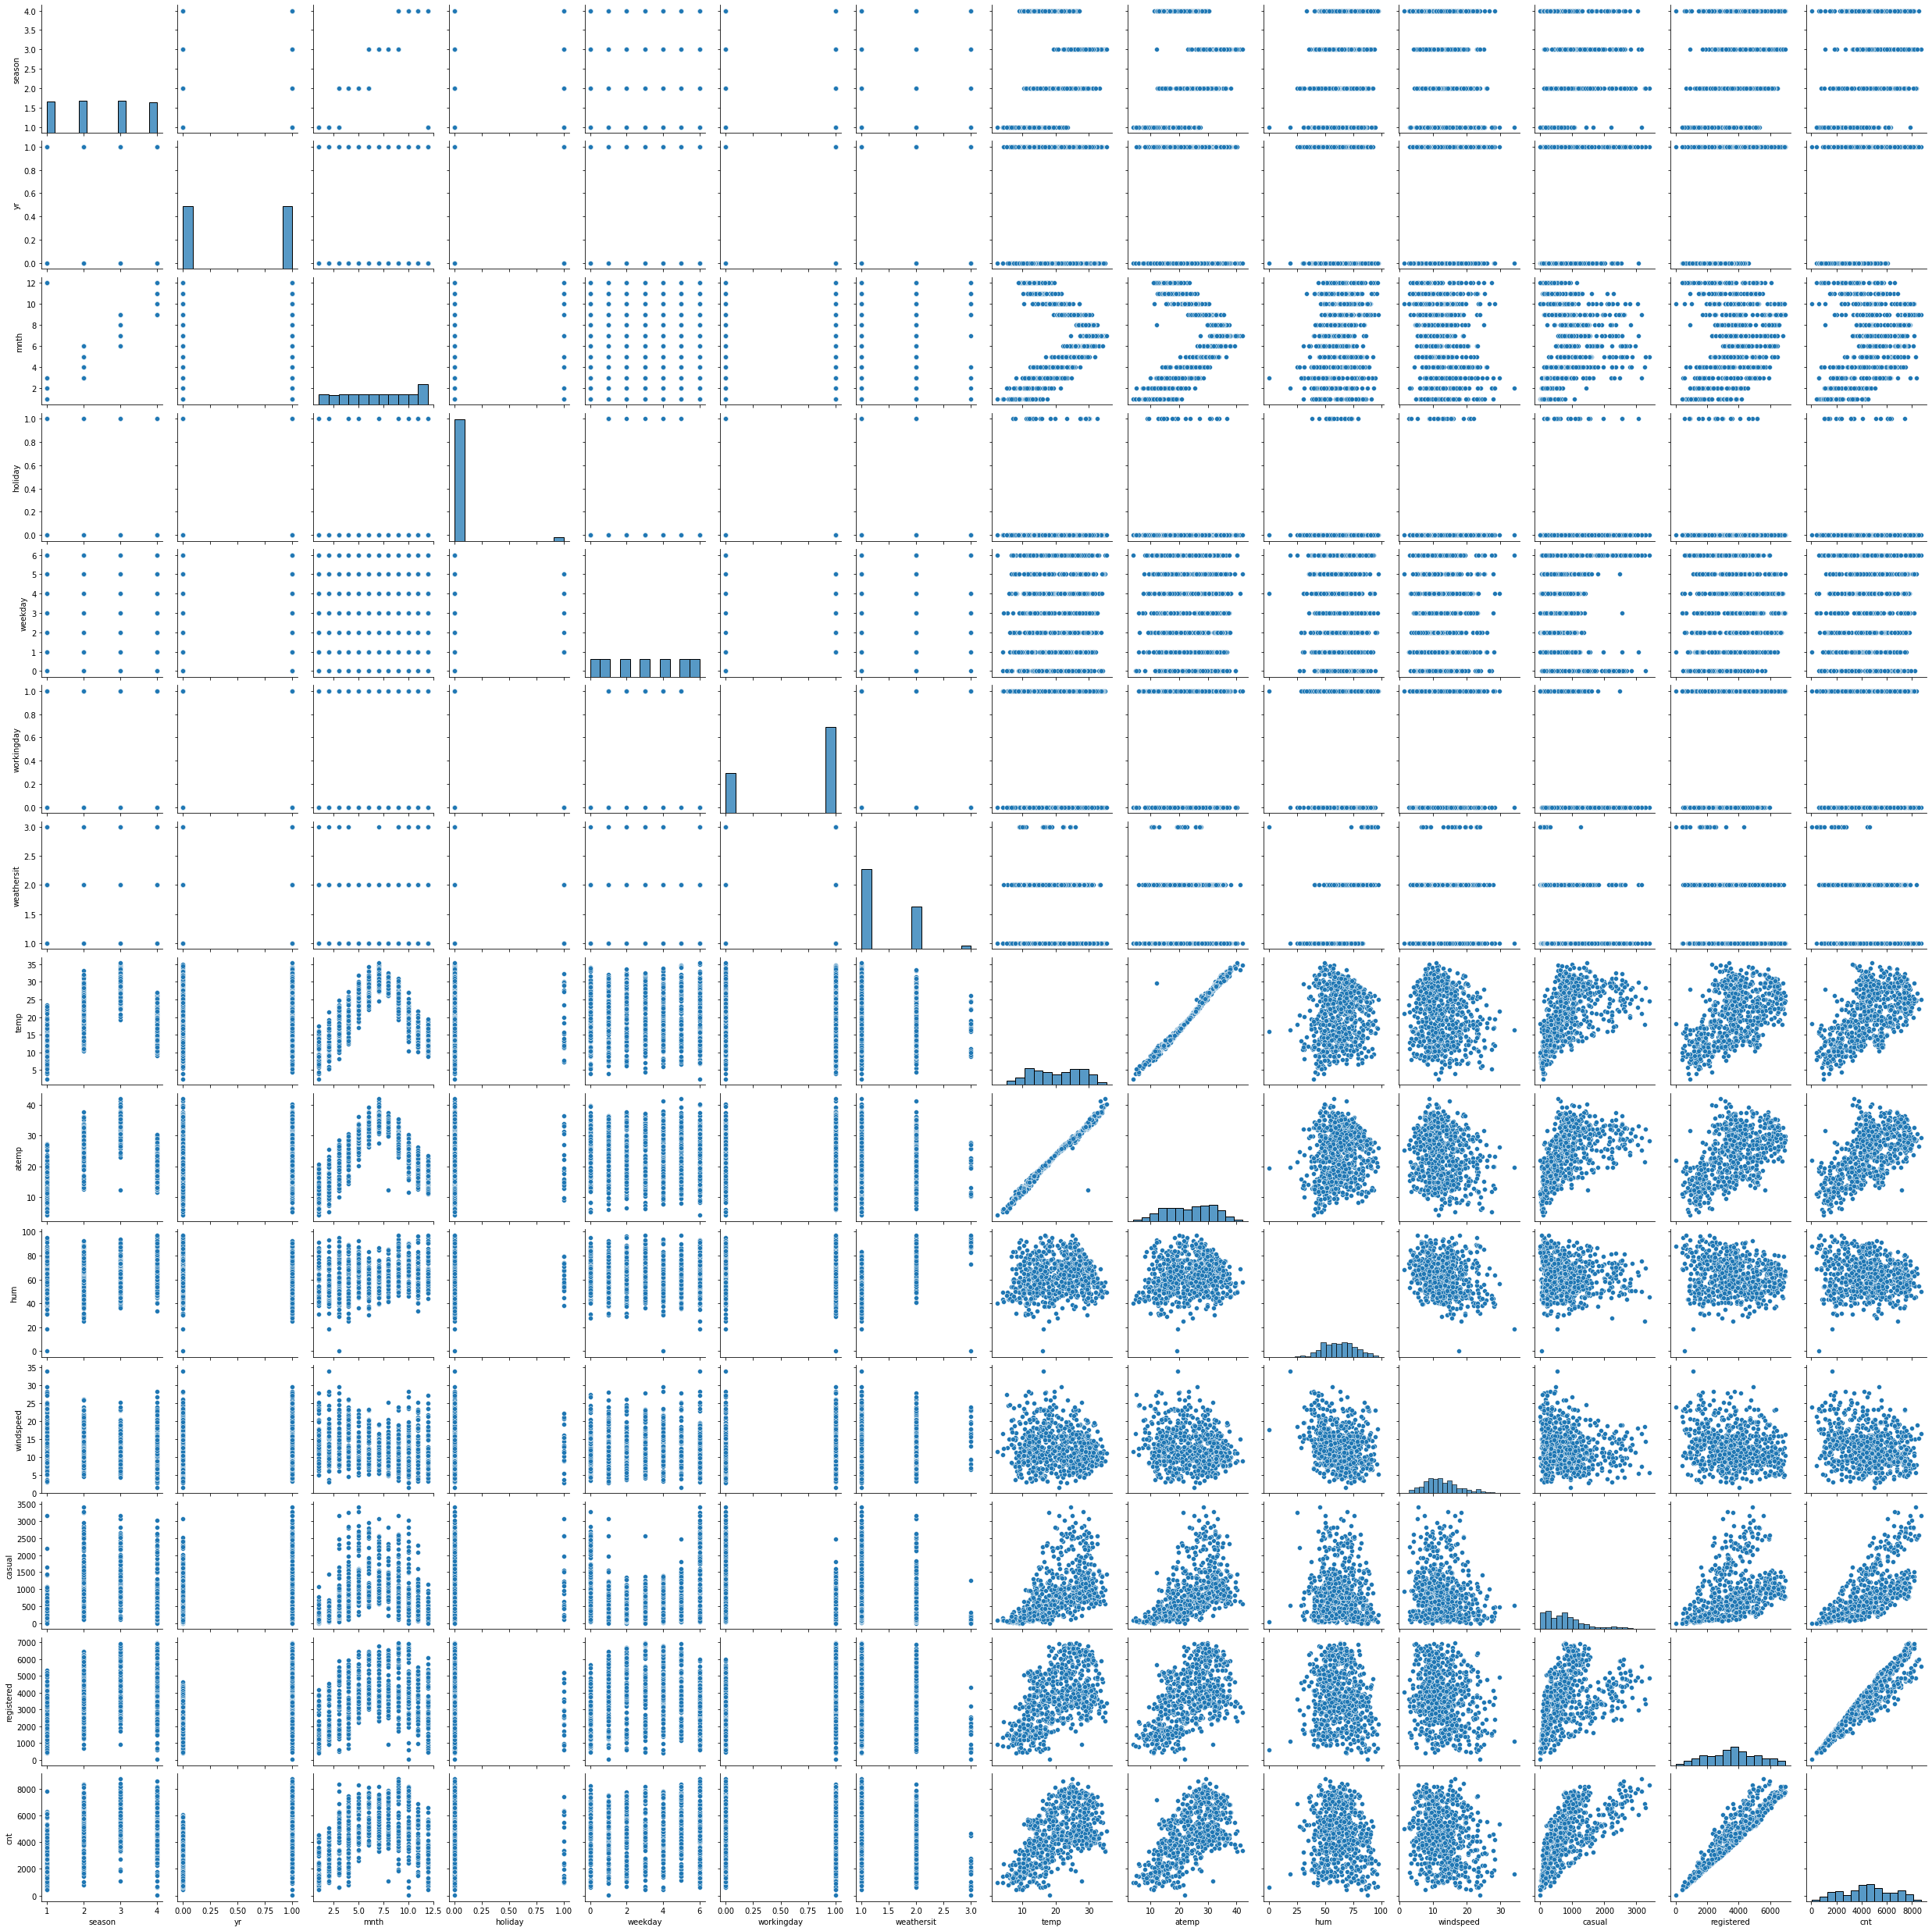

In [11]:
sns.pairplot(df)
plt.show()

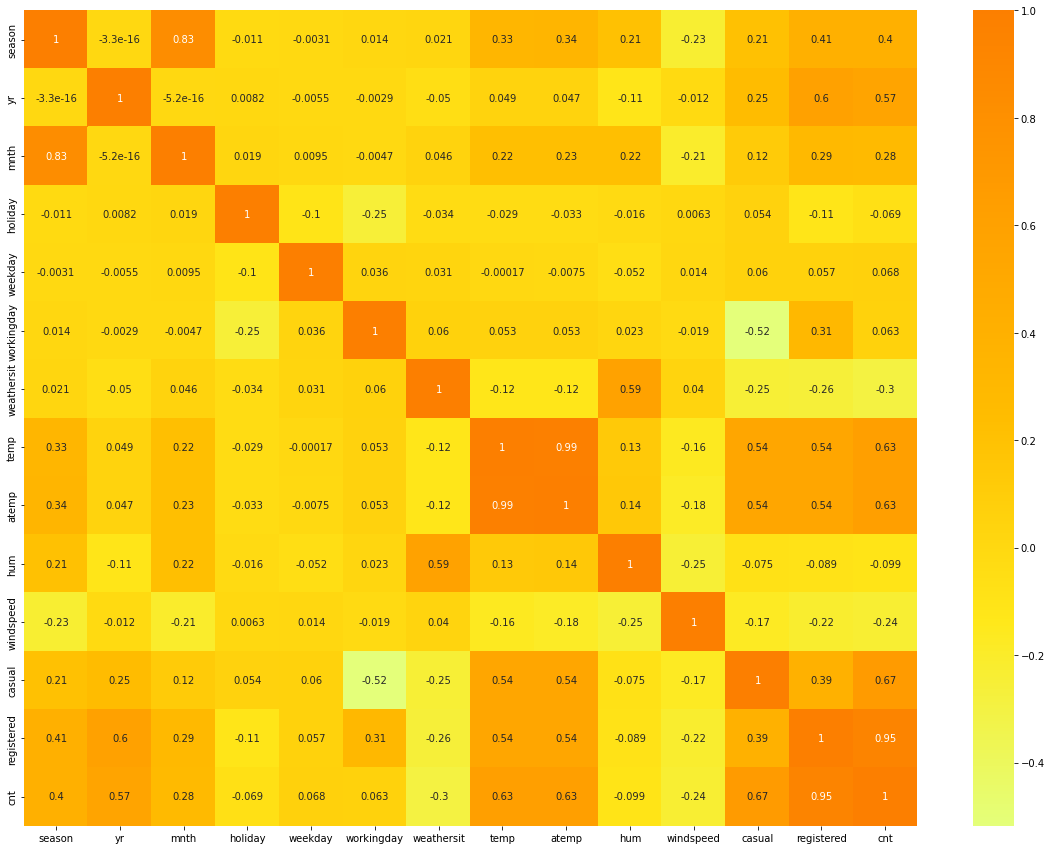

In [12]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, cmap = 'Wistia', annot= True, ax = ax)
plt.show()

* We can see there are some correlation using Heat map(with 0-1 scale) We can see (mnth - season) and (temp - atemp) are positive correlated

* Now we will see the distributuion of target variable

Text(0.5, 1.0, 'Distribution of total count of bikes rent')

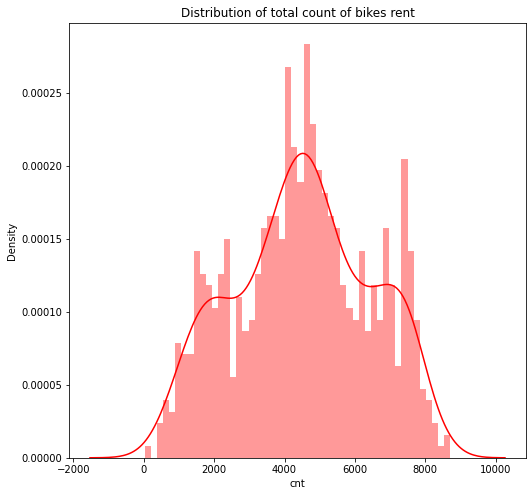

In [13]:
f= plt.figure(figsize=(18,8))
ax=f.add_subplot(121)
sns.distplot(df['cnt'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of total count of bikes rent')

* If we look at the left plot the cnt varies from 0 to 9000, the plot is normal distributed. 

In [14]:
# Counting categoricaL columns 
for col in df.columns:
  if col in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday']:
    print(df[col].value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
0    365
1    365
Name: yr, dtype: int64
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64


* Ploting violing graph for check IQR

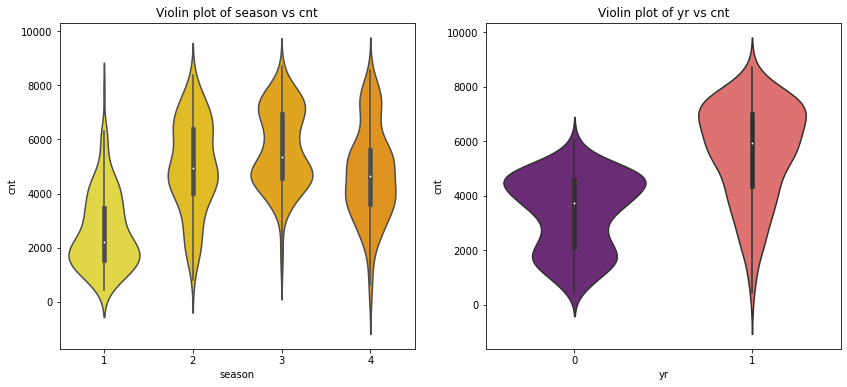

In [15]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='season', y='cnt',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of season vs cnt')

ax = f.add_subplot(122)
sns.violinplot(x='yr', y='cnt',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of yr vs cnt');

From left plot the rent count on seasons is almost in same range,it is average around 7000. In right plot the rent count for years is much wide range compare to seasons.

* Ploting boxpllot for weekday wrt cnt 

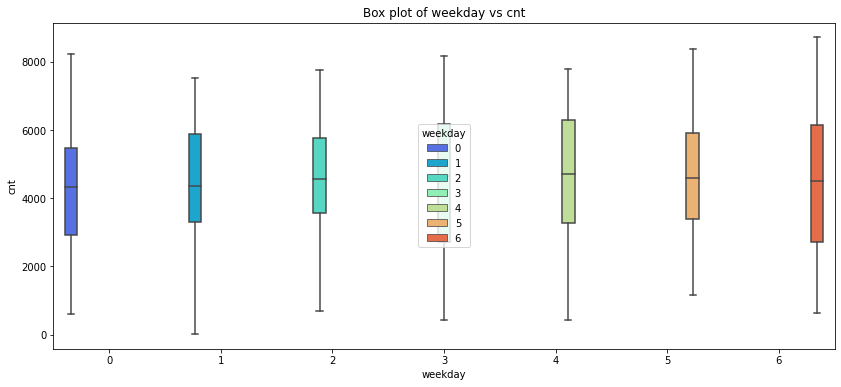

In [16]:
plt.figure(figsize=(14,6))
sns.boxplot(x='weekday', y='cnt',hue='weekday',data=df,palette='rainbow')
plt.title('Box plot of weekday vs cnt');

* We can see there is no outllier in above graph

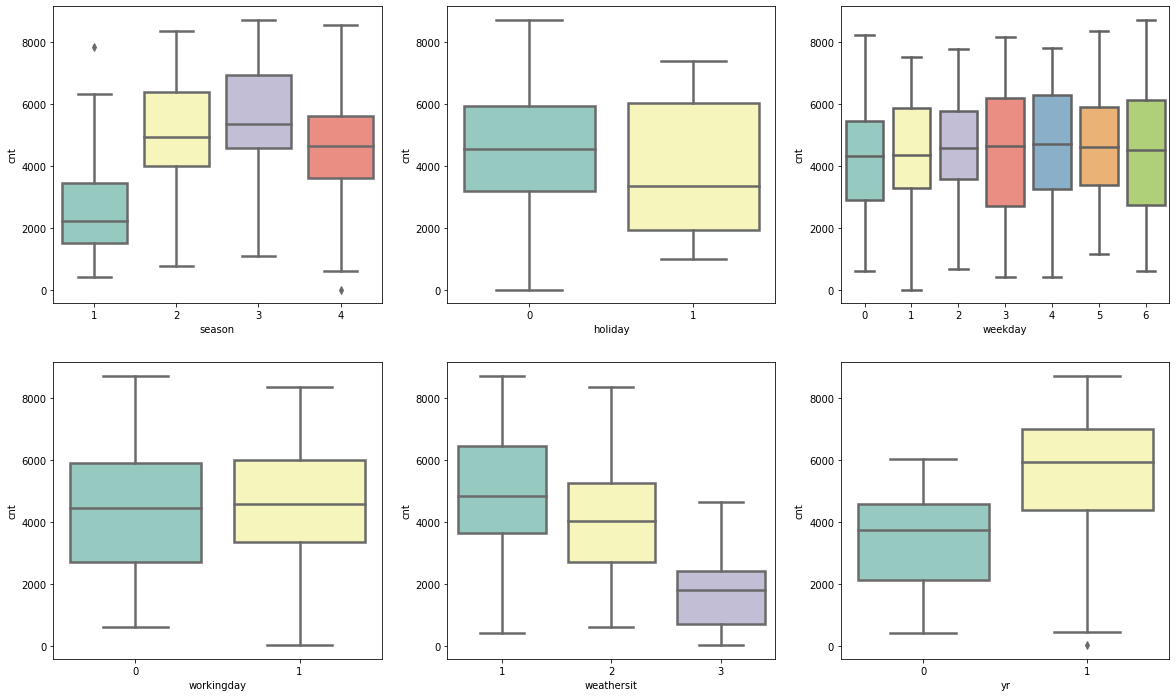

In [17]:
plt.figure(figsize=(20, 12))
plot_feature = ['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'yr']
for i, x in enumerate(plot_feature):
  plt.subplot(2,3,i+1)
  sns.boxplot(x = x, y = 'cnt', data = df,  palette="Set3", linewidth=2.5)

plt.show()

No outlier in any feature , our dataset is outlier free

## Step 3: Data Pre Processing

### Data Preprocessing
##### Encoding
  Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

1. Label Encoding
2. One hot encoding
3. Dummy variable trap

Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The Dummy variable trap is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

#### Dummy Variables

The variable `season` and `weathersit` has four and three levels respective. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [18]:
# Let's drop the first column from status df using 'drop_first = True'
season = pd.get_dummies(df['season'], drop_first = True)
season.columns = ['session_1', 'session_2', 'session_3']

In [19]:
weathersit = pd.get_dummies(df['weathersit'], drop_first = True)
weathersit.columns = ['weathersit_1', 'weathersit_2']

In [20]:
df = pd.concat([df, season, weathersit], axis = 1)

In [21]:
# Drop 'season', 'weathersit' as we have created the dummies for it
df.drop(['season', 'weathersit'], axis = 1, inplace = True)

In [22]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,session_1,session_2,session_3,weathersit_1,weathersit_2
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands


In [23]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

df_train, df_test = train_test_split(df, test_size = 0.3, random_state=100)

X_train = df_train.drop('cnt', axis=1)
y_test = df_train['cnt']
print(X_train.shape, y_test.shape)

(511, 16) (511,)


In [24]:
scaler = MinMaxScaler()

In [25]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'mnth', 'weekday', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [26]:
X_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,session_1,session_2,session_3,weathersit_1,weathersit_2
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.504359,0.025440,0.498043,0.677104,0.537386,0.513133,0.650333,0.320844,0.254739,0.524618,0.246575,0.262231,0.248532,0.344423,0.029354
std,0.500412,0.315036,0.157613,0.335932,0.468042,0.225640,0.212202,0.145741,0.169639,0.205816,0.228459,0.431440,0.440279,0.432585,0.475645,0.168963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.341151,0.332910,0.538858,0.199179,0.094483,0.354100,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.542077,0.529300,0.653499,0.298098,0.213045,0.525267,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754401,0.414438,0.327187,0.697372,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 5: Fitting the data into model

#### Checking Assumption 1 — Independence of observations

In [27]:
# We will remove corrleated variable according to correlation matrix
# month with season featrue(+ve corr)
# atemp with temp feature(+ve corr)
X_train.drop(columns=['mnth', 'atemp'], inplace=True)

#### Checking Assumption 2 — No Hidden or Missing Variables
  We have seen in Above EDA, there are no missing values.







#### Checking Assumption 3 — Linear relationship

Text(0.5, 1.0, 'Windspeed distribution')

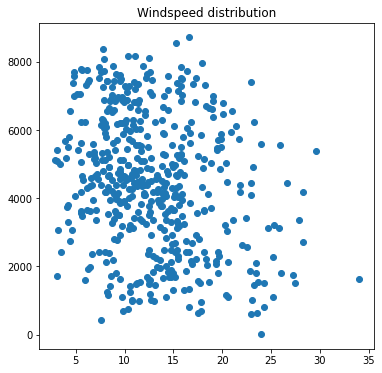

In [28]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.windspeed, df_train.cnt)
plt.title('Windspeed distribution')

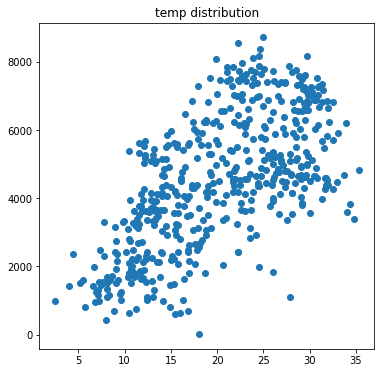

In [29]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('temp distribution')
plt.show()

#### Fitting single variable on Custom Linear regression function

In [30]:
def fit_lr(X, y, num_iter=1000, lr=0.01):
    n_samples = X.shape[0]
    slope = 0
    intercept = 0

    for _ in range(num_iter):
        y_predicted = np.dot(X, slope) + intercept

        ds = (1/n_samples) * np.dot(X.T, (y_predicted - y))
        di = (1/n_samples) * np.sum(y_predicted - y)

        slope -= lr * ds
        intercept -= lr * di
        
    return (intercept, slope)

3130.4909651206426 2862.266512282469


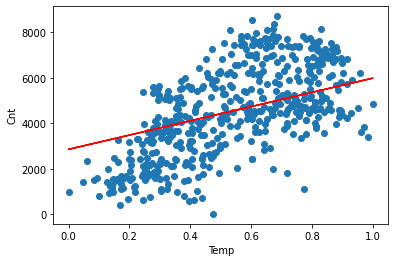

In [31]:
intercept, slope = fit_lr(np.array(X_train['temp']), np.array(y_test))
print(slope, intercept)

plt.scatter(X_train['temp'], y_test)
plt.xlabel('Temp')
plt.ylabel('Cnt')
plt.plot(X_train['temp'],slope*np.array(X_train['temp']) + intercept, color='r')

#### Fitting high correlated variable to target variable

In [32]:
def fit_ols(X, y):
  slope = []
  # Adding a constant
  X_const = sm.add_constant(X)

  # Create a first fitted model
  lr = sm.OLS(y, X_const).fit()

  # Check the parameters obtained
  para_lis = list(lr.params.keys())
  intercept = lr.params[para_lis[0]]
  print("="*78)
  print("Intercept: {}".format(intercept))
  for i in para_lis:
    if i != 'const':  
      print("{} Slope: {} ".format(i, lr.params[i]))
      slope.append(lr.params[i])
  print("="*78)
  print(lr.summary())
  return intercept, slope, lr

Intercept: -122.72264757192042
temp Slope: 1443.4353134428588 
registered Slope: 7316.454913488581 
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     2876.
Date:                Sun, 08 May 2022   Prob (F-statistic):          8.87e-278
Time:                        10:55:06   Log-Likelihood:                -3954.9
No. Observations:                 511   AIC:                             7916.
Df Residuals:                     508   BIC:                             7928.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

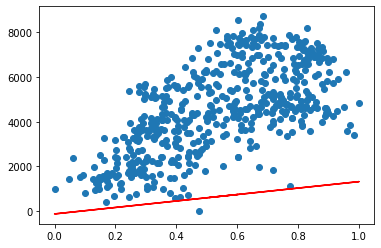

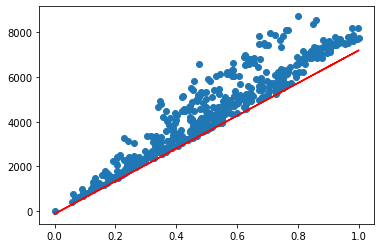

In [33]:
add_cols = ['temp', 'registered']
intercept, slope, lr = fit_ols(X_train[add_cols], y_test)

# Plotting all selected variable from the Correlation matrix after fitting to the model
for i in range(len(add_cols)):
  X = X_train[add_cols[i]]
  plt.scatter(X, y_test)
  plt.plot(X, slope[i] * np.array(X) + intercept, color='r')
  plt.show()


* We can see that only two variable giving the `0.91` R-squared

#### 3. Fitting all variable to the model

In [34]:
intercept, slope, lr = fit_ols(np.asarray(X_train), y_test)

Intercept: 22.000000000005365
x1 Slope: -1.2079226507921703e-12 
x2 Slope: -2.0374812947920873e-12 
x3 Slope: 1.0800249583553523e-12 
x4 Slope: 1.4210854715202004e-14 
x5 Slope: -3.737454790098127e-12 
x6 Slope: -8.640199666842818e-12 
x7 Slope: 1.4210854715202004e-13 
x8 Slope: 3281.0000000000036 
x9 Slope: 6926.000000000006 
x10 Slope: 1.3500311979441904e-13 
x11 Slope: -6.608047442568932e-13 
x12 Slope: 2.4868995751603507e-13 
x13 Slope: -1.8474111129762605e-13 
x14 Slope: -3.979039320256561e-13 
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.563e+31
Date:                Sun, 08 May 2022   Prob (F-statistic):               0.00
Time:                        10:55:06   Log-Likelihood:                 12844.
No. Observations:    

Its seems like our model is overfitted, SO we have to remove some unrelated features from the model using VIF

#### Checking Assumption 4 — Normality of the residuals

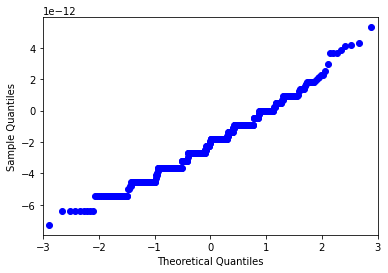

In [35]:
residuals = lr.resid
sm.qqplot(residuals)
plt.show()

* We can see that graph following linear trend.

#### Checking Assumption 5 — No or little Multicollinearity
* Checking VIF

Variance Inflation Factor or VIF. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [36]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_f = pd.DataFrame()
vif_f['Features'] = X_train.columns
vif_f['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_f['VIF'] = round(vif_f['VIF'], 2)
vif_f = vif_f.sort_values(by = "VIF", ascending = False)
vif_f

,Features,VIF
8,registered,42.98
4,temp,33.68
5,hum,17.10
3,workingday,10.16
7,casual,9.61
10,session_2,6.69
0,yr,6.05
6,windspeed,3.96
9,session_1,3.76
11,session_3,3.51


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [37]:
re_cols = ['casual', 'session_2', 'session_3', 'yr','windspeed', 'session_1', 'weekday','weathersit_1', 'weathersit_2', 'holiday']
X_train.drop(columns=re_cols, inplace=True)

In [38]:
intercept, slope, lr = fit_ols(np.asarray(X_train), y_test)

Intercept: 444.7585658638469
x1 Slope: -951.9330013029247 
x2 Slope: 1161.354192282223 
x3 Slope: -285.58782396404825 
x4 Slope: 8106.343329021336 
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     3530.
Date:                Sun, 08 May 2022   Prob (F-statistic):               0.00
Time:                        10:55:06   Log-Likelihood:                -3737.1
No. Observations:                 511   AIC:                             7484.
Df Residuals:                     506   BIC:                             7505.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0

#### Checking Assumption 6 — Homoscedasticity

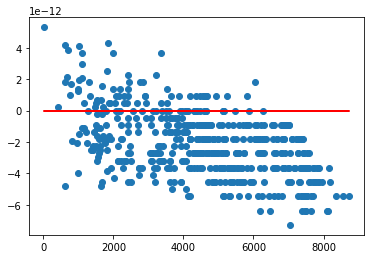

In [39]:
plt.scatter(y_test, residuals)
plt.plot(y_test, [0]*len(y_test), color='r')

We can see the Homoscedasticity relation with dependent variable, we have to transform target variable

#### Assumption 7 — All independent variables are uncorrelated with the error term


In [40]:
X_train.columns

Index(['workingday', 'temp', 'hum', 'registered'], dtype='object')

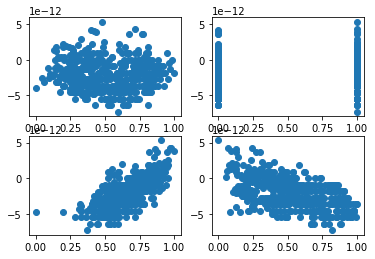

In [41]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(X_train['temp'], residuals)
ax2.scatter(X_train['workingday'], residuals)
ax3.scatter(X_train['hum'], residuals)
ax4.scatter(X_train['registered'], residuals)
plt.show()

#### Assumption 8 — Observations of the error term are uncorrelated with each other

In [42]:
# residuals = lr.resid
# plt.plot(residuals.index, residuals)

## Step 6: Scoring Metrics and Checking Error

In [43]:
y = df['cnt']
X = df.drop('cnt', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [44]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

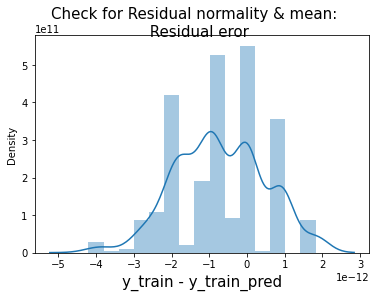

In [45]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Check for Residual normality & mean: \n Residual eror', fontsize = 15)                   
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()


In [46]:
reg = linear_model.LinearRegression()
X_train = X_train[['workingday', 'temp', 'hum', 'registered']]
X_test =  X_test[['workingday', 'temp', 'hum', 'registered']]
reg.fit(X_train, y_train)

LinearRegression()

Coefficients:  [-951.91285182   35.28515015   -2.94225854    1.1705334 ]
Variance score: 0.9546446200427908


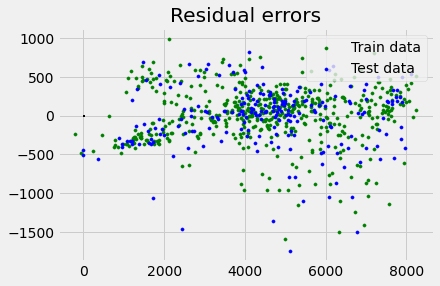

In [47]:
print('Coefficients: ', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test)))

plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')

plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')

plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

In [48]:
y_pred  = reg.predict(X_test)

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9546446200427908

* After Refining the model we getting `95%` R2_Score